## Exploring Datasets

This code explore the various datasets I'm using and their timeframes.

In [49]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import numpy as np
from windrose import WindroseAxes

In [50]:
data_path = Path.home()/'OneDrive'/'Kirstin'/'Uni'/'Year4'/'MSciProject'/'data_files'

### Manning Baselines

#### Mace Head, Ireland

In [51]:
files = (data_path / "manning_baselines").glob("MH*.txt")

combined_manning_df_MHD = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, skiprows=6, delim_whitespace=True)

    # Setting the index of the dataframe to be the extracted datetime and naming it time
    df.index = pd.to_datetime(df['YY'].astype(str) + "-" + \
                              df['MM'].astype(str) + "-" + \
                              df['DD'].astype(str) + " " + \
                              df['HH'].astype(str) + ":00:00")

    df.index.name = "time"

    combined_manning_df_MHD = pd.concat([combined_manning_df_MHD, df], ignore_index=False)

combined_manning_df_MHD = combined_manning_df_MHD.drop(['YY','MM','DD','HH','Index'], axis=1)

In [52]:
print(f"The data goes from {combined_manning_df_MHD.index.min()} to {combined_manning_df_MHD.index.max()}.")

The data goes from 1989-02-01 01:00:00 to 2023-12-31 23:00:00.


In [53]:
categories = []

for index, row in combined_manning_df_MHD.iterrows():
    Ct = row['Ct']

    if Ct <= 9:
        name = "mixed"
    elif Ct >= 10 and Ct <= 19:
        name = "baseline"
    elif Ct >= 20 and Ct <= 29:
        name = "local"
    elif Ct >= 30 and Ct <= 39:
        name = "southerly"
    elif Ct >= 40 and Ct <= 49:
        name = "polluted"
    elif Ct >= 60 and Ct <= 69:
        name = "upper troposphere"
    else:
        name = "else"

    categories.append(name)

#add list as a column
combined_manning_df_MHD["categories"] = categories

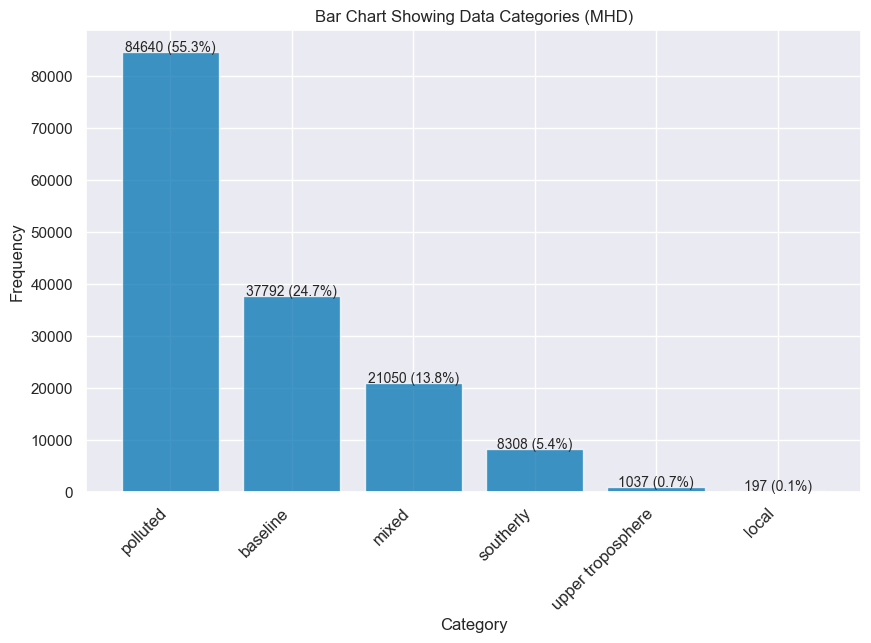

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax.bar(combined_manning_df_MHD['categories'].unique(), combined_manning_df_MHD['categories'].value_counts(), width=0.8, align='center', alpha=0.75)

# Adding data labels
total = len(combined_manning_df_MHD['categories'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height/total:.1%})',
            ha="center", fontsize=10)

ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart Showing Data Categories (MHD)')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

In [55]:
baseline = []

for index, row in combined_manning_df_MHD.iterrows():
    Ct = row['Ct']

    if Ct >= 10 and Ct <=19:
        label = 'Baseline'
    else:
        label = 'Not baseline'

    baseline.append(label)

#add list as a column
combined_manning_df_MHD["baseline"] = baseline

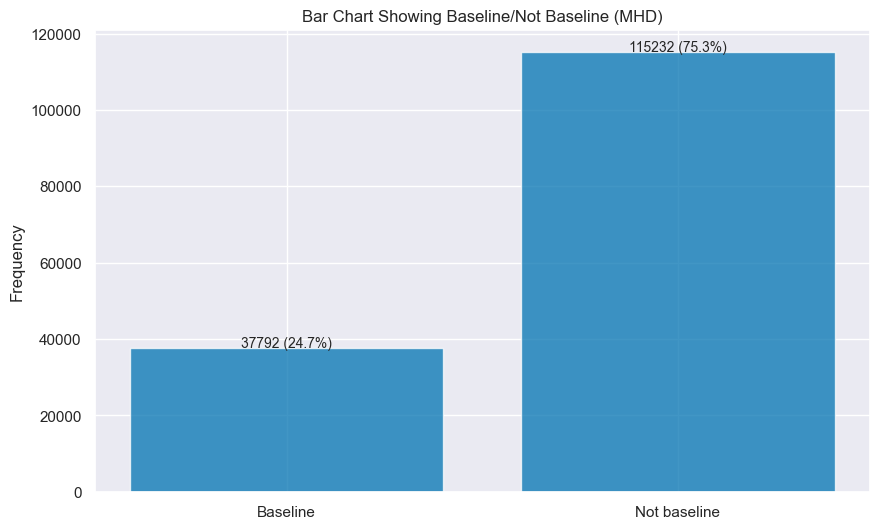

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax.bar(combined_manning_df_MHD['baseline'].unique()[::-1], combined_manning_df_MHD['baseline'].value_counts()[::-1], width=0.8, align='center', alpha=0.75)

total = len(combined_manning_df_MHD['baseline'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height/total:.1%})',
            ha="center", fontsize=10)

ax.set_ylabel('Frequency')
ax.set_title('Bar Chart Showing Baseline/Not Baseline (MHD)')
plt.show()

#### Gosan, South Korea

In [57]:
files = (data_path / "manning_baselines").glob("GS*.txt")

combined_manning_df_GSN = pd.DataFrame()

for file in files:
    df = pd.read_csv(file, skiprows=6, delim_whitespace=True)

    # Setting the index of the dataframe to be the extracted datetime and naming it time
    df.index = pd.to_datetime(df['YY'].astype(str) + "-" + \
                              df['MM'].astype(str) + "-" + \
                              df['DD'].astype(str) + " " + \
                              df['HH'].astype(str) + ":00:00")

    df.index.name = "time"

    combined_manning_df_GSN = pd.concat([combined_manning_df_GSN, df], ignore_index=False)

combined_manning_df_GSN = combined_manning_df_GSN.drop(['YY','MM','DD','HH','Index'], axis=1)

In [58]:
print(f"The data goes from {combined_manning_df_GSN.index.min()} to {combined_manning_df_GSN.index.max()}.")

The data goes from 2007-11-12 01:00:00 to 2023-12-31 23:00:00.


In [59]:
categories = []

for index, row in combined_manning_df_GSN.iterrows():
    Ct = row['Ct']

    if Ct <= 9:
        name = "mixed"
    elif Ct >= 10 and Ct <= 19:
        name = "baseline"
    elif Ct >= 20 and Ct <= 29:
        name = "local"
    elif Ct >= 30 and Ct <= 39:
        name = "southerly"
    elif Ct >= 40 and Ct <= 49:
        name = "polluted"
    elif Ct >= 60 and Ct <= 69:
        name = "upper troposphere"
    else:
        name = "else"

    categories.append(name)

#add list as a column
combined_manning_df_GSN["categories"] = categories

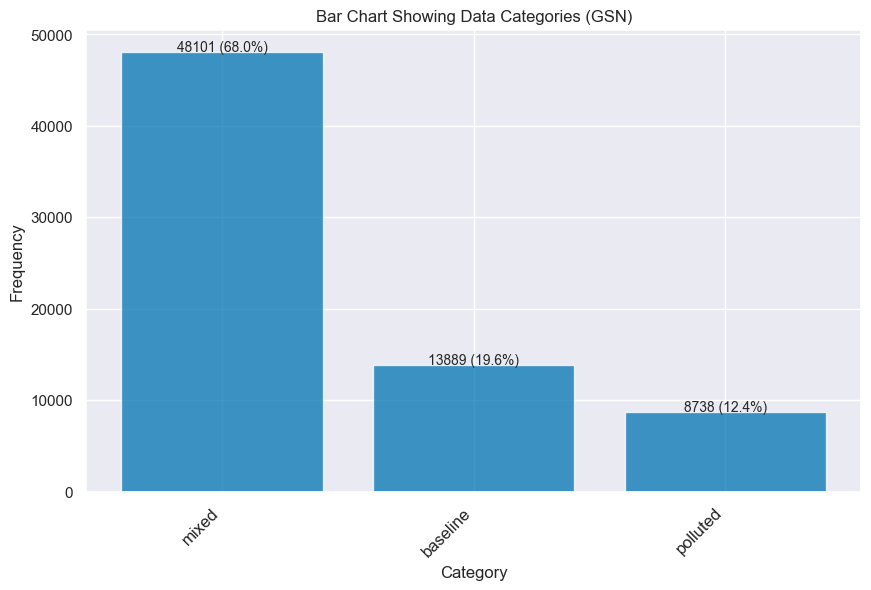

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax.bar(combined_manning_df_GSN['categories'].unique(), combined_manning_df_GSN['categories'].value_counts(), width=0.8, align='center', alpha=0.75)

# Adding data labels
total = len(combined_manning_df_GSN['categories'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height/total:.1%})',
            ha="center", fontsize=10)

ax.set_xlabel('Category')
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart Showing Data Categories (GSN)')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

In [61]:
baseline = []

for index, row in combined_manning_df_GSN.iterrows():
    Ct = row['Ct']

    if Ct >= 10 and Ct <=19:
        label = 'Baseline'
    else:
        label = 'Not baseline'

    baseline.append(label)

#add list as a column
combined_manning_df_GSN["baseline"] = baseline

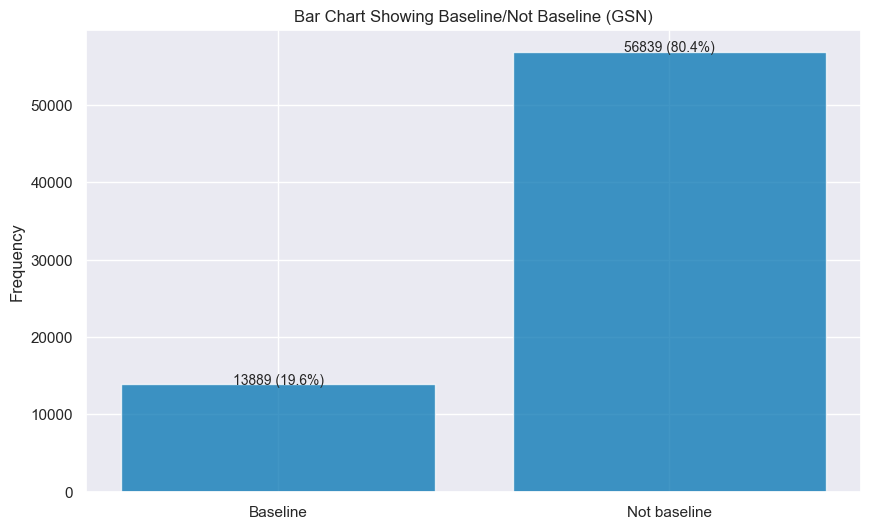

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style='darkgrid')
sns.set_palette("colorblind")

ax.bar(combined_manning_df_GSN['baseline'].unique()[::-1], combined_manning_df_GSN['baseline'].value_counts()[::-1], width=0.8, align='center', alpha=0.75)

total = len(combined_manning_df_GSN['baseline'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height/total:.1%})',
            ha="center", fontsize=10)

ax.set_ylabel('Frequency')
ax.set_title('Bar Chart Showing Baseline/Not Baseline (GSN)')
plt.show()

### ECMWF

### AGAGE

##### Mace Head, Ireland

In [137]:
# MHD
hfc134a_MHD_ds = xr.open_dataset(data_path/'AGAGE'/'AGAGE-public-files'/'hfc-134a'/'AGAGE-combined_MHD_hfc-134a.nc')
hfc152a_MHD_ds = xr.open_dataset(data_path/'AGAGE'/'AGAGE-public-files'/'hfc-152a'/'AGAGE-combined_MHD_hfc-152a.nc')

##### Gosan, South Korea

In [140]:
# exploring agage data, using HFC-134a, HFC-152a and N2O as examples
hfc134a_GSN_ds = xr.open_dataset(data_path/'AGAGE'/'AGAGE-public-files'/'hfc-134a'/'AGAGE-GCMS-Medusa_GSN_hfc-134a.nc')
hfc152a_GSN_ds= xr.open_dataset(data_path/'AGAGE'/'AGAGE-public-files'/'hfc-152a'/'AGAGE-GCMS-MEDUSA_GSN_hfc-152a.nc')

#### Comparing MHD & GSN

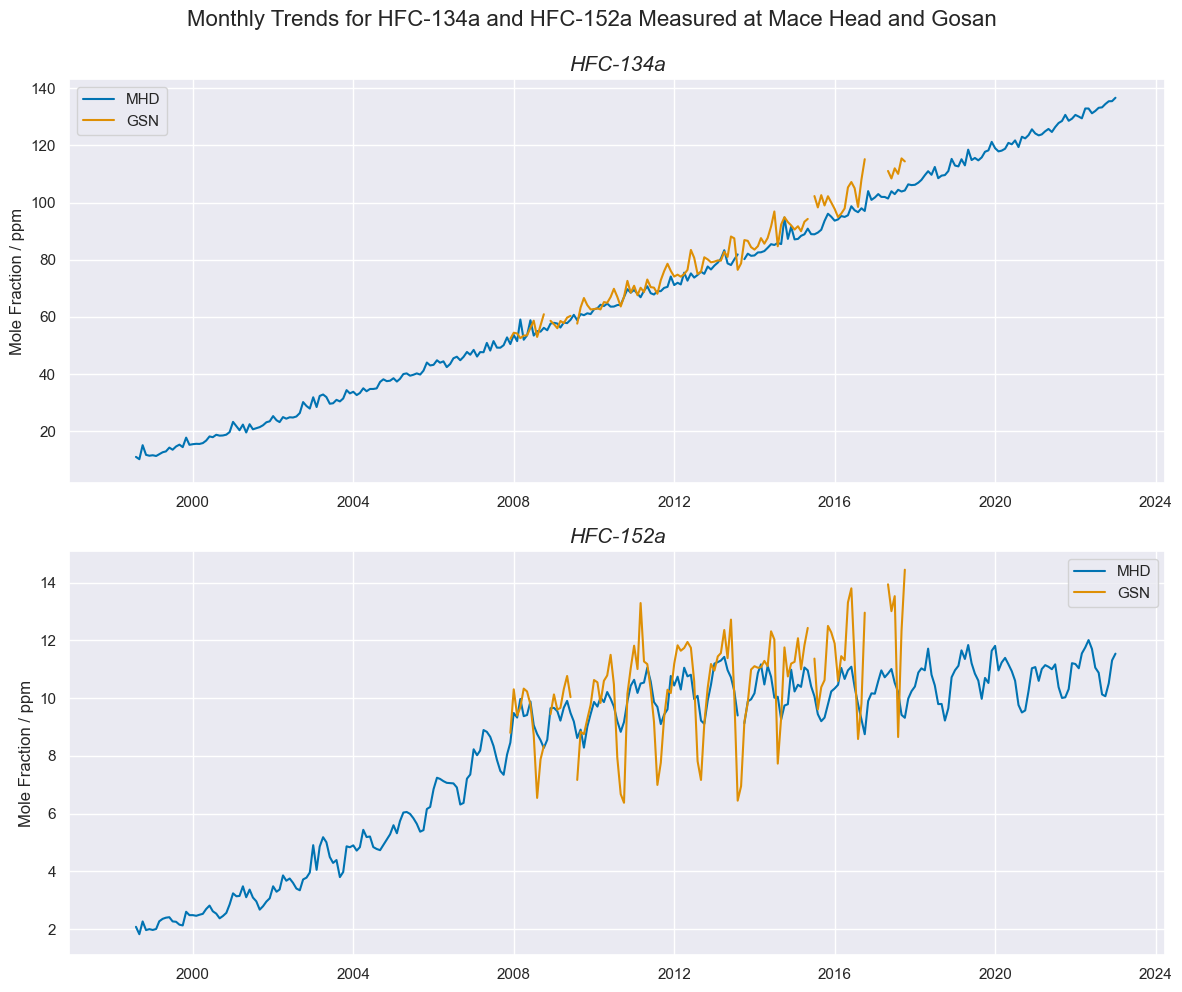

In [162]:
hfc134a_MHD = hfc134a_MHD_ds['mf'].to_dataframe()
hfc152a_MHD = hfc152a_MHD_ds['mf'].to_dataframe()
hfc134a_GSN = hfc134a_GSN_ds['mf'].to_dataframe()
hfc152a_GSN = hfc152a_GSN_ds['mf'].to_dataframe()

hfc134a_MHD_monthly = hfc134a_MHD.resample('M').mean()
hfc152a_MHD_monthly = hfc152a_MHD.resample('M').mean()
hfc134a_GSN_monthly = hfc134a_GSN.resample('M').mean()
hfc152a_GSN_monthly = hfc152a_GSN.resample('M').mean()


fig, axs = plt.subplots(2,1, figsize=(12, 10))

axs[0].plot(hfc134a_MHD_monthly.index, hfc134a_MHD_monthly['mf'], label='MHD')
axs[0].plot(hfc134a_GSN_monthly.index, hfc134a_GSN_monthly['mf'], label='GSN')
axs[0].set_title("HFC-134a",fontsize=15, fontstyle='italic')
axs[0].set_ylabel("Mole Fraction / ppm")
axs[0].legend()

axs[1].plot(hfc152a_MHD_monthly.index, hfc152a_MHD_monthly['mf'], label='MHD')
axs[1].plot(hfc152a_GSN_monthly.index, hfc152a_GSN_monthly['mf'], label='GSN')
axs[1].set_title("HFC-152a",fontsize=15, fontstyle='italic')
axs[1].set_ylabel("Mole Fraction / ppm")
axs[1].legend()

fig.suptitle("Monthly Trends for HFC-134a and HFC-152a Measured at Mace Head and Gosan", fontsize=16, y=0.99)
fig.tight_layout()

### Comparing Datetime

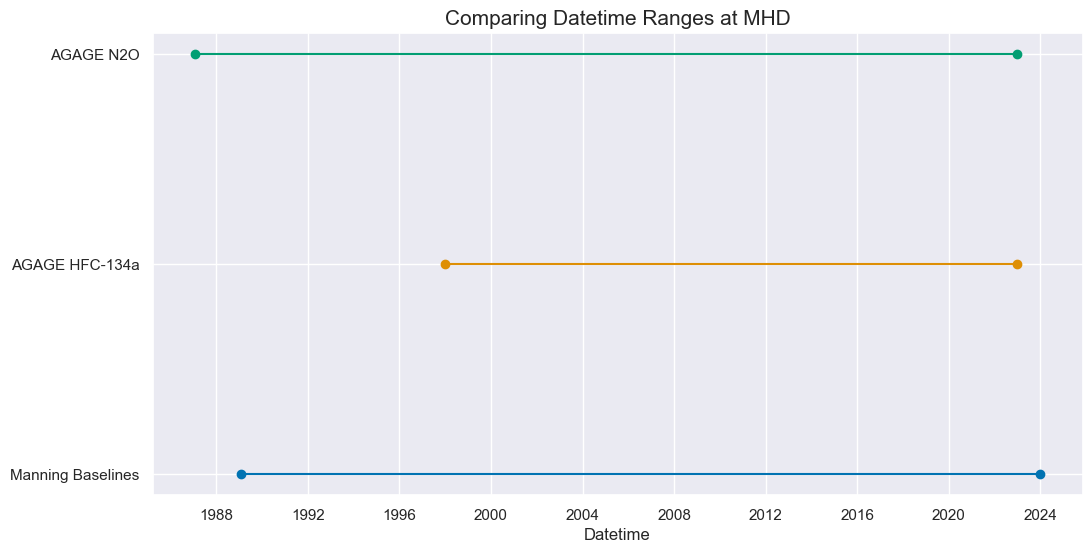

In [106]:
hfc134a_df = hfc134a_MHD_ds.to_dataframe()
n2o_df = n2o_MHD_ds.to_dataframe()

datasets = [combined_manning_df_MHD, hfc134a_df, n2o_df]
names = ['Manning Baselines', 'AGAGE HFC-134a', 'AGAGE N2O']


plt.figure(figsize=(12, 6))

# plotting lines for each dataset
for i, dataset in enumerate(datasets):
    plt.plot([dataset.index.min(), dataset.index.max()], [i, i], label=names[i], marker='o')

plt.yticks(range(len(datasets)), names)
plt.xlabel('Datetime')
plt.title('Comparing Datetime Ranges at MHD', fontsize=15)
plt.show()


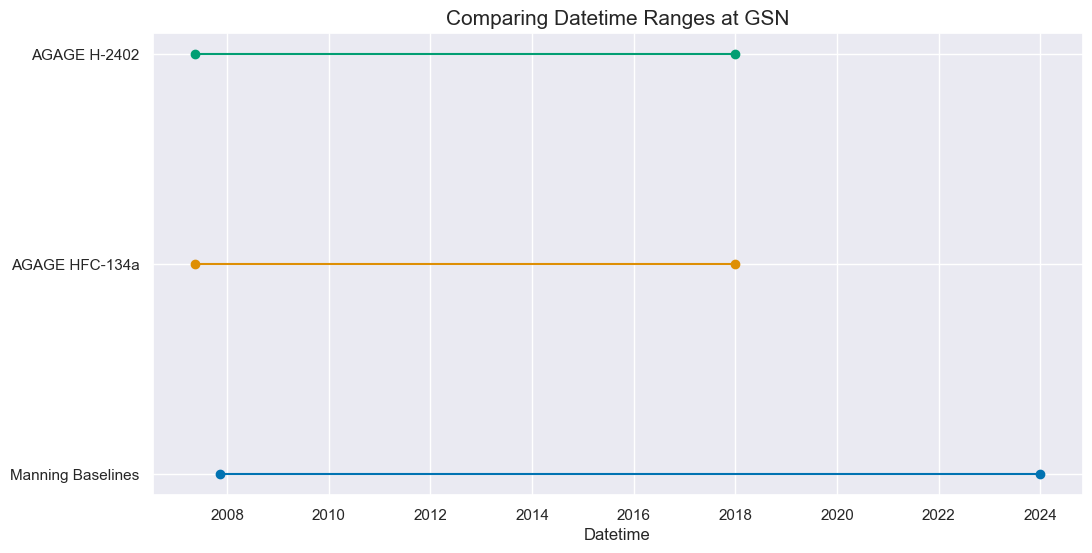

In [111]:
hfc134a_df = hfc134a_GSN_ds.to_dataframe()
h2402_df = h2402_GSN_ds.to_dataframe()

datasets = [combined_manning_df_GSN, hfc134a_df, h2402_df]
names = ['Manning Baselines', 'AGAGE HFC-134a', 'AGAGE H-2402']


plt.figure(figsize=(12, 6))

# plotting lines for each dataset
for i, dataset in enumerate(datasets):
    plt.plot([dataset.index.min(), dataset.index.max()], [i, i], label=names[i], marker='o')

plt.yticks(range(len(datasets)), names)
plt.xlabel('Datetime')
plt.title('Comparing Datetime Ranges at GSN', fontsize=15)
plt.show()